In [5]:
from google.colab.patches import cv2_imshow
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

1.

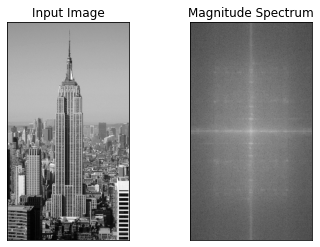

In [7]:
img = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)

f = np.fft.fft2(img)

fshift = np.fft.fftshift(f)

magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

2

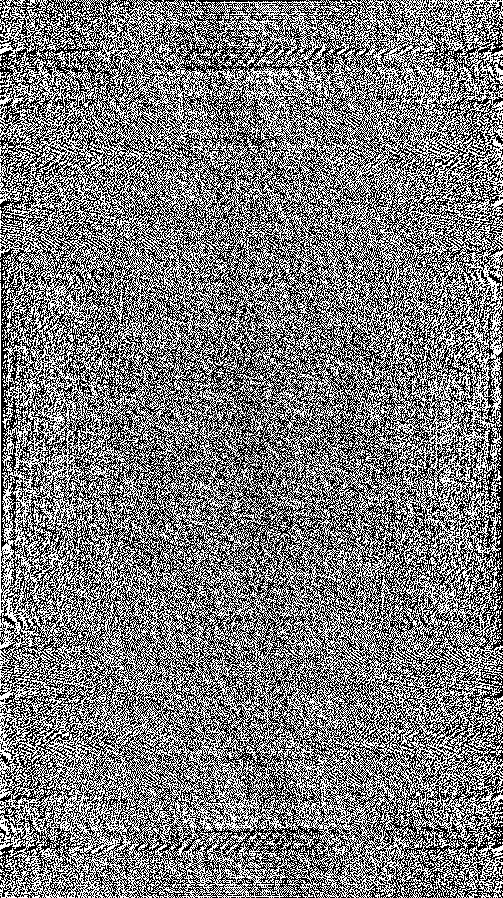

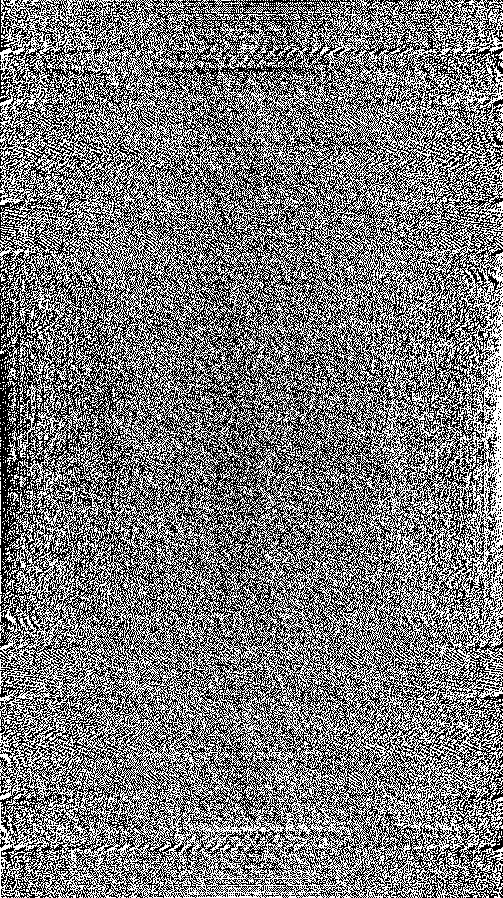

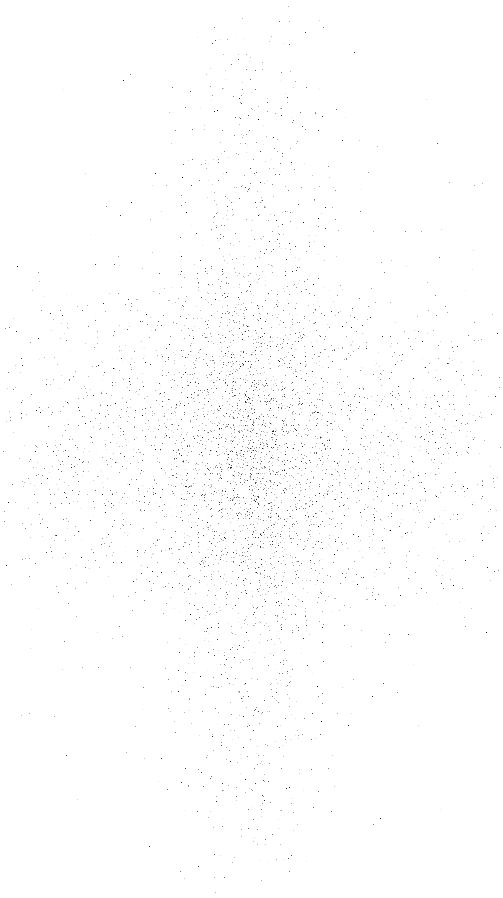

In [10]:
cv2_imshow(np.real(f))
cv2_imshow(np.imag(f))
cv2_imshow(np.abs(f))

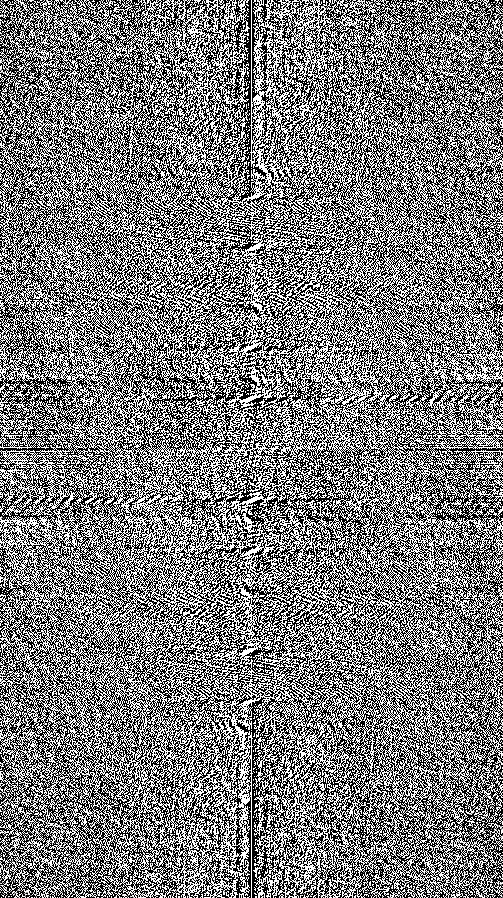

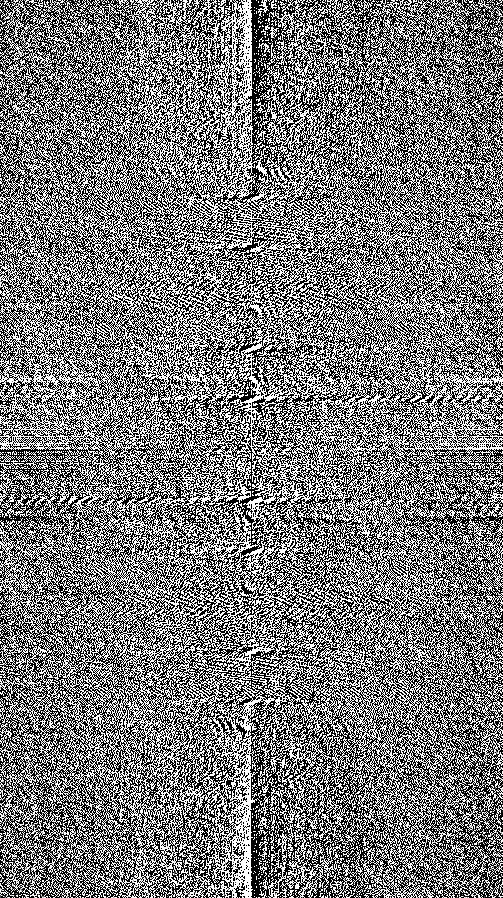

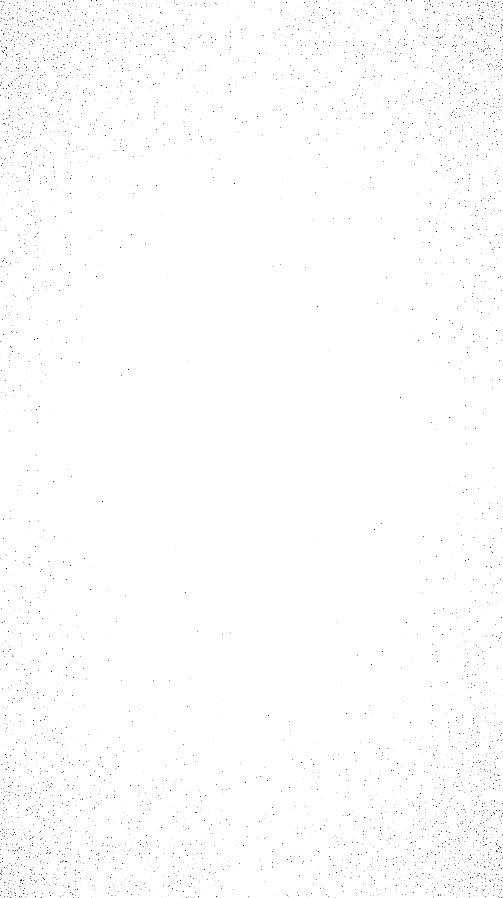

In [11]:
cv2_imshow(np.real(fshift))
cv2_imshow(np.imag(fshift))
cv2_imshow(np.abs(fshift))

3.

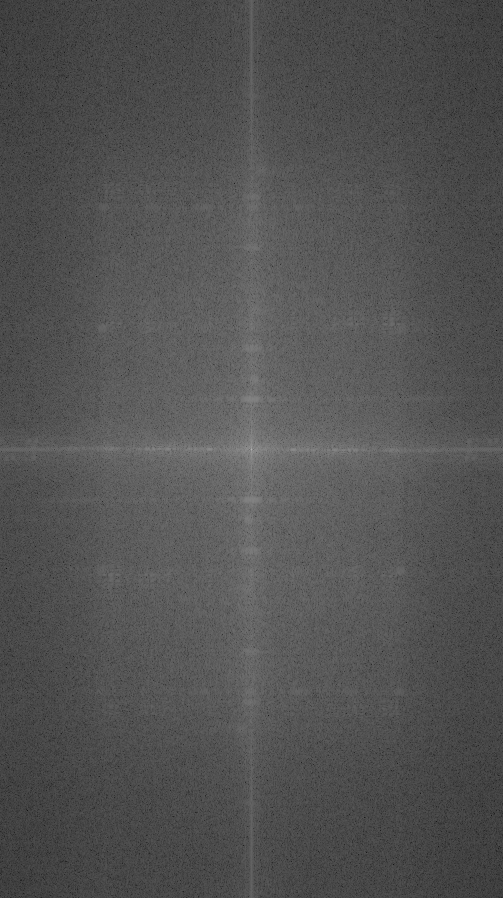

In [12]:
cv2_imshow(10*np.log(np.abs(fshift)))

4.

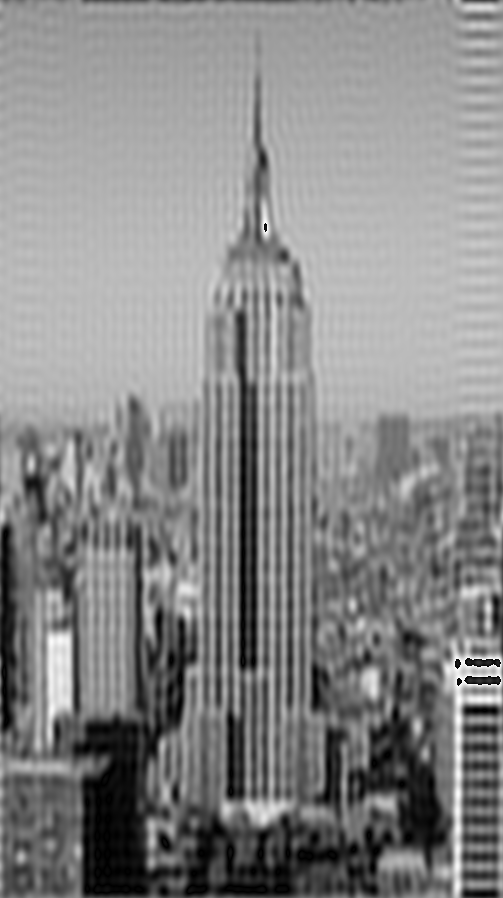

In [13]:
f = np.fft.fft2(img)
rows, cols = img.shape
crow, ccol = rows//2, cols//2
mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), 50, (1, 1, 1), -1)
fshift = np.fft.fftshift(f)
filtered_fshift = fshift * mask
filtered_f = np.fft.ifftshift(filtered_fshift)
filtered_img = np.fft.ifft2(filtered_f)
filtered_img = np.abs(filtered_img)

# Convert the filtered image to 8-bit unsigned integer format for display
filtered_img = np.uint8(filtered_img)

# Show the filtered image
cv2_imshow(filtered_img)

5.

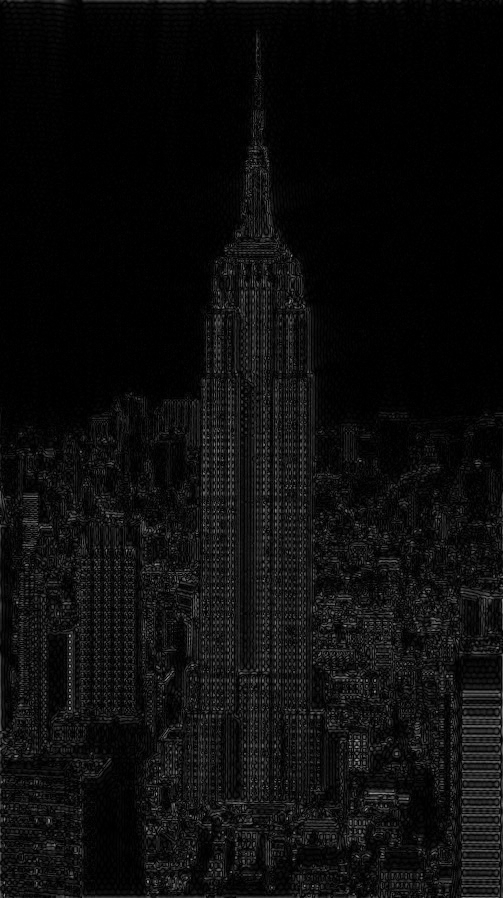

In [14]:
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0])**2 + (y - center[1])**2 <= r*r
mask[mask_area] = 0

fshift_filtered = fshift * mask
f_filtered = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_filtered)
img_back = np.abs(img_back)

cv2_imshow(img_back)